# Costa Rican Household Poverty Level Prediction

해당 데이터는 target 변수를 예측하는 것이다. target 값은 1, 2, 3, 4 네 개의 값을 가지며, 다중 분류에 속한다.

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
cd data

c:\Users\qotnd\OneDrive\바탕 화면\ADP\data


In [3]:
df = pd.read_csv("costa_rican_train.csv")

In [4]:
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


데이터는 143개의 컬럼을 갖고 있으며, 약 1만 개의 행을 갖고 있다.

##### 데이터 타입 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
cat = []
for var, type in zip(df.columns, df.dtypes):
    if type == "object":
        print(f"{var} : {type}")
        cat.append(var)

Id : object
idhogar : object
dependency : object
edjefe : object
edjefa : object


In [7]:
for i in cat:
    cnt = len(df[i].unique())
    print(f"{i}의 고유한 값의 수 : {cnt}")

Id의 고유한 값의 수 : 9557
idhogar의 고유한 값의 수 : 2988
dependency의 고유한 값의 수 : 31
edjefe의 고유한 값의 수 : 22
edjefa의 고유한 값의 수 : 22


총 143개의 컬럼 중 5개는 object타입으로 범주형 형태의 변수를 갖지만 실제로 확인한 결과 dependency, edjefe, edjefa 변수의 경우 수치형 변수와 범주형 변수가 섞여 있다. 올바른 값 예측을 위해 하나의 타입으로 통일해준다.

##### edjefe
- edjefe 변수의 경우 "years of education of male head of household" 라고 설명이 쓰여 있으며 no의 경우 교육을 받은 적 없다는 의미로 0으로 대체하며 yes의 경우 수치형 변수의 평균으로 대체하며, string 타입으로 되어있는 수치형 값을 int값으로 수정한다.

In [8]:
edjefe_mean = df[(df.edjefe !="no") & (df.edjefe!="yes")]["edjefe"].astype("int").mean()
edjefe_mean

8.56611424541608

In [9]:
# 변환하기
df.loc[df["edjefe"]=="yes", "edjefe"] = str(edjefe_mean)
df.loc[df["edjefe"]=="no", "edjefe"] = "0"

In [10]:
# 타입 변환
df.edjefe = df.edjefe.astype("float64") ## 평균이 소수점이므로 float를 사용한다.

##### edjefa

edjefa 변수 또햔 "yes"의 경우 값의 평균으로 대체하며, "no"를 0으로 대체한다.

In [11]:
df.edjefa.unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [12]:
df[(df["edjefa"] !="no") & (df["edjefa"]!="yes")].edjefa

2       11
11      11
12      11
13       4
14       4
        ..
9535     5
9536     5
9537     5
9538     5
9539     5
Name: edjefa, Length: 3258, dtype: object

In [13]:
edjefa_mean = df[(df["edjefa"] !="no") & (df["edjefa"]!="yes")]["edjefa"].astype("int").mean()
edjefa_mean

8.476365868631062

In [14]:
### 변환하기
df.loc[df["edjefa"]=="yes","edjefa"] = str(edjefa_mean)
df.loc[df["edjefa"]=="no","edjefa"] = "0"

In [15]:
# 타입 변환
df.edjefa = df.edjefa.astype("float64")

##### dependency

dependency의 경우 의존도에 대한 변수이다. 위의 변수들과 마찬가지로 수치형 변수에 no와 yes가 섞여 있는 것을 확인할 수 있다.no의 경우 0의 값으로 대체하고 yes의 경우 평균값으로 대체한다.

In [16]:
df.dependency.unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [17]:
dep_mean = df[(df["dependency"]!="no") & (df["dependency"] != "yes")]["dependency"].astype("float").mean()
dep_mean

1.5653709487201788

In [18]:
## 값 대체하기
df.loc[df["dependency"]=="yes","dependency"] = str(dep_mean)
df.loc[df["dependency"]=="no", "dependency"] = "0"

In [19]:
# 타입 변환하기
df.dependency = df.dependency.astype("float")

In [20]:
# 해당 데이터의 경우 범주형 변수로 넣어주면 된다.
df.idhogar

0       21eb7fcc1
1       0e5d7a658
2       2c7317ea8
3       2b58d945f
4       2b58d945f
          ...    
9552    d6c086aa3
9553    d6c086aa3
9554    d6c086aa3
9555    d6c086aa3
9556    d6c086aa3
Name: idhogar, Length: 9557, dtype: object

##### 결측치 확인

In [21]:
df.isnull().sum()/len(df)

Id                 0.000000
v2a1               0.717798
hacdor             0.000000
rooms              0.000000
hacapo             0.000000
                     ...   
SQBovercrowding    0.000000
SQBdependency      0.000000
SQBmeaned          0.000523
agesq              0.000000
Target             0.000000
Length: 143, dtype: float64

In [22]:
cat = df.columns

In [23]:
## 결측치
for var in cat:
    if df[var].isnull().sum()!=0:
        print(f"{var} : {round(df[var].isnull().sum()*100/len(df),2)}%")
        print(f"{var} : {round(df[var].isnull().sum())}")

v2a1 : 71.78%
v2a1 : 6860
v18q1 : 76.82%
v18q1 : 7342
rez_esc : 82.95%
rez_esc : 7928
meaneduc : 0.05%
meaneduc : 5
SQBmeaned : 0.05%
SQBmeaned : 5


##### 결측치가 있는 변수 설명
- v2a1 : Monthly rent payment(월별 렌트비)
- v18q1 : number of tablets household owns(가구가 소유한 테블릿 수)
- rez_esc : Years behind in school
- meaneduc : average years of education for adults(성인 평균 교육 기간)
- SQBmeaned : 표준 편차

v2a1, v18q1, rez_esc 변수의 경우 한 컬럼의 결측값이 50% 이상이므로 target변수 예측에 도움이 되는 정보가 되지 못할 것으로 판단된다. 따라서 해당 컬럼을 삭제해준다.

In [24]:
df_new = df.drop(columns = ["v2a1", "v18q1", "rez_esc"])

"meaneduc", "SQBmenaed" 변수의 경우 결측값이 1퍼센트 미만의 값을 가진다. 따라서 결측치에 해당하는 행을 삭제한다.

In [25]:
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [26]:
df_not_null = df_new.dropna()

In [27]:
# 결측치 확인하기
for var in df_not_null.columns:
    if df_not_null[var].isnull().sum()!=0:
        print(var)

결측치가 있는 컬럼은 모두 없어졌다.

##### target 변수 분포 확인

<AxesSubplot:xlabel='Target'>

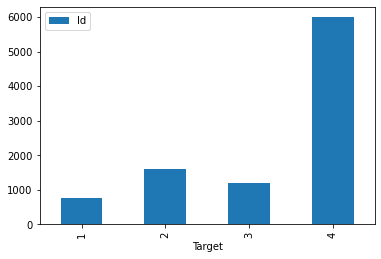

In [28]:
df[["Target", "Id"]].groupby(by = "Target").count().plot.bar()

## 주성분 분석(PCA)
변수가 많을 수록 알고리즘의 성능이 저하될 수 있다. 이런 현상을 **차원의 저주**라고 하며, 차원이 늘어남에 따라 데이터 간의 거리가 멀어지는 현상 또는 각 차원별 같은 영역의 자료를 갖고 있을 때 전체 영역에서 설명할 수 있는 데이터의 비율은 줄어드는 '공간의 성김 현상(Sparsity)'이 발생한다.
해당 데이터는 설명변수가 100개 이상의 값을 가지므로 차원의 저주가 발생할 수 있으므로 PCA를 통해 변수를 줄여주도록 한다.

##### train_test_split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df_not_null.drop(columns="Target")
y = df_not_null["Target"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1234)

In [34]:
X_train

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
210,ID_ba367f2ed,0,7,0,1,1,1,0,1,1,...,46,441,2116,9,441,1,0.562500,0.2500,361.000000,2116
1500,ID_fedcd1697,0,6,0,1,1,0,0,1,1,...,14,49,196,16,225,4,1.777778,1.0000,342.250000,196
3909,ID_1e1e92245,0,4,0,1,1,1,0,2,2,...,7,1,49,16,121,4,4.000000,1.0000,169.000000,49
1712,ID_6bcca5c50,0,5,0,1,1,0,0,1,1,...,63,169,3969,4,0,0,4.000000,0.0000,196.000000,3969
9397,ID_ce7ebdf27,0,5,0,1,1,0,0,3,3,...,24,121,576,16,0,1,1.777778,1.0000,40.111115,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,ID_8a3b1052c,0,7,0,1,1,1,0,3,3,...,33,196,1089,16,0,0,1.000000,1.0000,150.062500,1089
9320,ID_782e4fefe,0,6,0,1,1,0,0,4,4,...,62,16,3844,25,16,1,1.562500,0.0625,52.562500,3844
7854,ID_dac0e6ee1,0,4,1,1,0,0,2,3,5,...,14,36,196,81,0,64,9.000000,64.0000,16.000000,196
5850,ID_bbd82f010,0,4,0,1,1,1,0,1,1,...,35,36,1225,25,81,9,6.250000,2.2500,56.250000,1225


In [39]:
int_var = []
cat_var = []

for var in X_train.columns:
    if X_train[var].dtypes =="O":
        cat_var.append(var)
    else:
        int_var.append(var)

In [46]:
X_train_int = X_train[int_var]

In [50]:
# 수치형 변수 정규화화
from sklearn.preprocessing import StandardScaler
X_train_pca = StandardScaler().fit_transform(X_train_int)

In [55]:
# 주성분 추출
from sklearn.decomposition import PCA
pca = PCA()

In [56]:
pca_fit = pca.fit(X_train_pca)

In [70]:
sum(pca.explained_variance_ratio_[:71])

0.9046485188271743

71개의 변수로 줄이면 분산의 약 0.9가 된다. 따라서 전체 데이터의 90퍼센트 정도를 설명할 수 있다.

In [73]:
pca_n = PCA(n_components = 71)
pca_fit_n = pca.fit(X_train_pca)

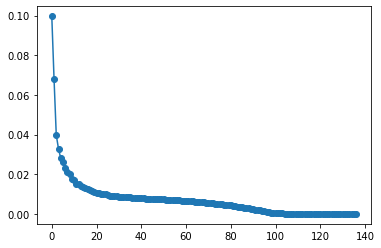

In [75]:
import matplotlib.pyplot as plt
plt.plot(pca_fit_n.explained_variance_ratio_, 'o-')

# 주성분 분석
- 고차원의 데이터를 저차원의 데이터로 환원시키는 기법이다. 새로운 변수를 원 변수의 선형 결합으로 만들어 변수를 축약한다.
- 장점 : 고차원의 데이터를 큰 정보손실 없이 변환해준다. 시각화 편리
1. 변수를 줄임
2. 학습집합의 크기를 줄여줌
3. 학습시 빠름
- 단점
1. 결과값의 성능이 좋다는 보장은 없다.(오히려 성능을 포기하고 속도를 개선시킨다.)